In [1]:
# 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage.filters import gaussian_filter

In [2]:
df=pd.read_csv("Colombia_COVID19_Coronavirus_casos_diarios.csv")
df.head()

OBJECTID  NUEVOS_CASOS  TOTAL_CASOS  TOTAL_MUERTES  TOTAL_RECUPERADOS  \
0      1237             1            1              0                  0   
1      1238             0            1              0                  0   
2      1239             0            1              0                  0   
3      1240             2            3              0                  0   
4      1241             0            3              0                  0   

      FECHA_ACTUALIZACION                              GlobalID  \
0  2020/03/06 05:00:00+00  bfbde439-2467-4f24-9b33-2fb38e3abd61   
1  2020/03/07 05:00:00+00  c21b35c0-d55e-44e0-8768-9356c9c1d545   
2  2020/03/08 05:00:00+00  0a1a91f7-15eb-4118-9879-1ab4d959b1d2   
3  2020/03/09 05:00:00+00  2fb6f539-a27c-4d00-84e1-b19193ceb500   
4  2020/03/10 05:00:00+00  f14b28c9-d593-4a53-9e2a-d7965c38c22c   

   NUEVOS_MUERTOS  NUEVO_RECUPERADOS  
0               0                  0  
1               0                  0  
2               0                  0  
3               0                  0  
4               0                  0

In [3]:
# Normalización

df_max_scaled=df.copy()     # se hace una copia del dataframe

# se aplica abs en caso de que haya un menos
df_max_scaled["NUEVOS_CASOS_(NORM)"]=df_max_scaled["NUEVOS_CASOS"]/df_max_scaled["NUEVOS_CASOS"]\
    .abs().max()

df_max_scaled.head()

OBJECTID  NUEVOS_CASOS  TOTAL_CASOS  TOTAL_MUERTES  TOTAL_RECUPERADOS  \
0      1237             1            1              0                  0   
1      1238             0            1              0                  0   
2      1239             0            1              0                  0   
3      1240             2            3              0                  0   
4      1241             0            3              0                  0   

      FECHA_ACTUALIZACION                              GlobalID  \
0  2020/03/06 05:00:00+00  bfbde439-2467-4f24-9b33-2fb38e3abd61   
1  2020/03/07 05:00:00+00  c21b35c0-d55e-44e0-8768-9356c9c1d545   
2  2020/03/08 05:00:00+00  0a1a91f7-15eb-4118-9879-1ab4d959b1d2   
3  2020/03/09 05:00:00+00  2fb6f539-a27c-4d00-84e1-b19193ceb500   
4  2020/03/10 05:00:00+00  f14b28c9-d593-4a53-9e2a-d7965c38c22c   

   NUEVOS_MUERTOS  NUEVO_RECUPERADOS  NUEVOS_CASOS_(NORM)  
0               0                  0             0.000028  
1               0                  0             0.000000  
2               0                  0             0.000000  
3               0                  0             0.000056  
4               0                  0             0.000000

In [4]:
df_max_scaled["FORMAT_FECHA_ACTUALIZACION"]=pd.to_datetime(df_max_scaled["FECHA_ACTUALIZACION"],
               format='%Y-%m-%d')

df_max_scaled.head()

OBJECTID  NUEVOS_CASOS  TOTAL_CASOS  TOTAL_MUERTES  TOTAL_RECUPERADOS  \
0      1237             1            1              0                  0   
1      1238             0            1              0                  0   
2      1239             0            1              0                  0   
3      1240             2            3              0                  0   
4      1241             0            3              0                  0   

      FECHA_ACTUALIZACION                              GlobalID  \
0  2020/03/06 05:00:00+00  bfbde439-2467-4f24-9b33-2fb38e3abd61   
1  2020/03/07 05:00:00+00  c21b35c0-d55e-44e0-8768-9356c9c1d545   
2  2020/03/08 05:00:00+00  0a1a91f7-15eb-4118-9879-1ab4d959b1d2   
3  2020/03/09 05:00:00+00  2fb6f539-a27c-4d00-84e1-b19193ceb500   
4  2020/03/10 05:00:00+00  f14b28c9-d593-4a53-9e2a-d7965c38c22c   

   NUEVOS_MUERTOS  NUEVO_RECUPERADOS  NUEVOS_CASOS_(NORM)  \
0               0                  0             0.000028   
1               0                  0             0.000000   
2               0                  0             0.000000   
3               0                  0             0.000056   
4               0                  0             0.000000   

  FORMAT_FECHA_ACTUALIZACION  
0  2020-03-06 05:00:00+00:00  
1  2020-03-07 05:00:00+00:00  
2  2020-03-08 05:00:00+00:00  
3  2020-03-09 05:00:00+00:00  
4  2020-03-10 05:00:00+00:00

In [28]:
def MASK(x):
    if np.abs(x)<=1:
        return 3/4*(1-x**2)

In [31]:
ajuste=[]

b=10/2

for dia in df_max_scaled["FORMAT_FECHA_ACTUALIZACION"]:
    
    df_max_scaled["GAUSSIAN_KERNEL"]=MASK((df_max_scaled["FORMAT_FECHA_ACTUALIZACION"]-dia).apply(lambda x: x.days/b))


    # normalización dividiendo por la suma
    df_max_scaled["GAUSSIAN_KERNEL"] /= df_max_scaled["GAUSSIAN_KERNEL"].sum()

    # el fitting se hace a la columna de nuevos casos normalizados
    ajuste.append((df_max_scaled["NUEVOS_CASOS_(NORM)"]*df_max_scaled["GAUSSIAN_KERNEL"]).sum())

df_max_scaled["AJUSTE"]=ajuste

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [25]:
ajuste=[]

b=10/2

for dia in df_max_scaled["FORMAT_FECHA_ACTUALIZACION"]:

    
    if np.abs((df_max_scaled["FORMAT_FECHA_ACTUALIZACION"]-dia)/b).apply(lambda x: x.days) <= 1:
        df_max_scaled["GAUSSIAN_KERNEL"]=3/4*(1-((df_max_scaled["FORMAT_FECHA_ACTUALIZACION"]-dia)/b).apply(lambda x: x.days)**2)


        # normalización dividiendo por la suma
        df_max_scaled["GAUSSIAN_KERNEL"] /= df_max_scaled["GAUSSIAN_KERNEL"].sum()

        # el fitting se hace a la columna de nuevos casos normalizados
        ajuste.append((df_max_scaled["NUEVOS_CASOS_(NORM)"]*df_max_scaled["GAUSSIAN_KERNEL"]).sum())

df_max_scaled["AJUSTE"]=ajuste

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
if np.abs((df_max_scaled["FORMAT_FECHA_ACTUALIZACION"]-dia)/b).apply(lambda x: x.days) < 1:
        df_max_scaled["GAUSSIAN_KERNEL"]=3/4*(1-((df_max_scaled["FORMAT_FECHA_ACTUALIZACION"]-dia)/b).apply(lambda x: x.days)**2)


In [23]:
ajuste=[]

b=1/2

for dia in df_max_scaled["FORMAT_FECHA_ACTUALIZACION"]:
    
    # Aplicamos el kernel gaussiano a cada uno de los elementos
    #df_max_scaled["GAUSSIAN_KERNEL"]=np.exp(-(((df_max_scaled["FORMAT_FECHA_ACTUALIZACION"]-dia).apply(lambda x: x.days))**2) /\
                                          #  (2*(b**2)))
    
    df_max_scaled["GAUSSIAN_KERNEL"]=3/4*(1-((df_max_scaled["FORMAT_FECHA_ACTUALIZACION"]-dia)/b).apply(lambda x: x.days)**2)


    # normalización dividiendo por la suma
    df_max_scaled["GAUSSIAN_KERNEL"] /= df_max_scaled["GAUSSIAN_KERNEL"].sum()

    # el fitting se hace a la columna de nuevos casos normalizados
    ajuste.append((df_max_scaled["NUEVOS_CASOS_(NORM)"]*df_max_scaled["GAUSSIAN_KERNEL"]).sum())

df_max_scaled["AJUSTE"]=ajuste

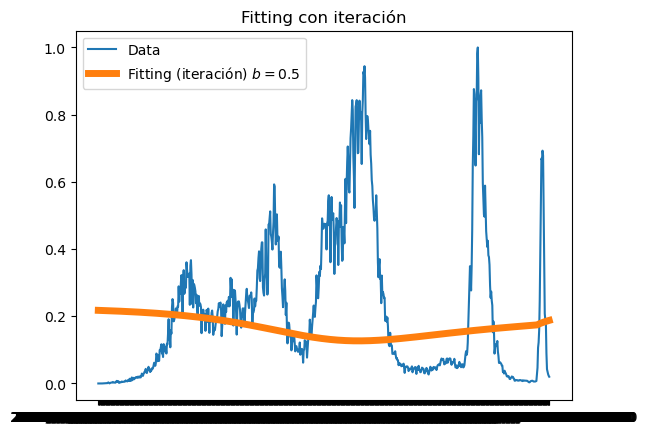

In [24]:
plt.title("Fitting con iteración")
plt.plot(df_max_scaled["FECHA_ACTUALIZACION"],df_max_scaled["NUEVOS_CASOS_(NORM)"],label="Data")
plt.plot(df_max_scaled["FECHA_ACTUALIZACION"],df_max_scaled["AJUSTE"],lw=5,label=f"Fitting (iteración) $b={b}$")
plt.legend()
plt.show()